# Generate figures for the paper
- Each figure corresponds to a different graph structure configuration
- Please see the paper for details

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
ConfigNumGraphs = 2

## Define graph/experiment configurations for figures

In [3]:
from moo.data_generation import ExpConfig, DataGenerator
# Define configurations
fig05_expconfig = ExpConfig(
    L=30, U=30, NumEdges=200, ML=0.5, MU=0.5, BC=0.1, NumGraphs=ConfigNumGraphs,
    shuffle=False,  # Change to shuffle
    seed=None, # This is the default
)
print('Fig 05', fig05_expconfig)

Fig 05 <ExpConfig: L=2, U=30, NumNodes=32, NumEdges=200, ML=0.5, MU=0.5, BC=0.1, NumGraphs=2, shuffle=False, seed=42>


In [4]:
fig06_expconfig = ExpConfig(
    L=30, U=30, NumEdges=100, ML=0.5, MU=0.5, BC=0.1, NumGraphs=ConfigNumGraphs,
    shuffle=False,
    seed=None,
)
print('Fig 06 ', fig06_expconfig)

Fig 06  <ExpConfig: L=30, U=30, NumNodes=60, NumEdges=100, ML=0.5, MU=0.5, BC=0.1, NumGraphs=2, shuffle=False, seed=42>


In [5]:
fig07_expconfig = ExpConfig(
    L=10, U=50, NumEdges=100, ML=0.5, MU=0.5, BC=0.1, NumGraphs=ConfigNumGraphs,
    shuffle=False,
    seed=None,
)
print('Fig 07 ', fig07_expconfig)

Fig 07  <ExpConfig: L=10, U=50, NumNodes=60, NumEdges=100, ML=0.5, MU=0.5, BC=0.1, NumGraphs=2, shuffle=False, seed=42>


In [6]:
fig08_expconfig = ExpConfig(
    L=10, U=50, NumEdges=100, ML=0.5, MU=0.5, BC=0.2, NumGraphs=ConfigNumGraphs,
    shuffle=False,
    seed=None,
)
print('Fig 08 ', fig08_expconfig)

Fig 08  <ExpConfig: L=10, U=50, NumNodes=60, NumEdges=100, ML=0.5, MU=0.5, BC=0.2, NumGraphs=2, shuffle=False, seed=42>


In [7]:
fig09_expconfig_a = ExpConfig(
    L=100, U=20, NumEdges=200, ML=0.4, MU=0.4, BC=0.2, NumGraphs=ConfigNumGraphs,
    shuffle=False,
    seed=None,
)
fig09_expconfig_b = ExpConfig(
    L=500, U=100, NumEdges=1000, ML=0.4, MU=0.4, BC=0.2, NumGraphs=ConfigNumGraphs,
    shuffle=False,
    seed=None,
)
print('Fig 09 a ', fig09_expconfig_a)
print('Fig 09 b ', fig09_expconfig_b)

Fig 09 a  <ExpConfig: L=100, U=20, NumNodes=120, NumEdges=200, ML=0.4, MU=0.4, BC=0.2, NumGraphs=2, shuffle=False, seed=42>
Fig 09 b  <ExpConfig: L=500, U=100, NumNodes=600, NumEdges=1000, ML=0.4, MU=0.4, BC=0.2, NumGraphs=2, shuffle=False, seed=42>


## Run community detection algorithms/generate results

### Setup and usage example

In [8]:
from moo.multicriteria import ComDetMultiCriteria
from moo.contestant import ComDetWalkTrap, ComDetFastGreedy, ComDetEdgeBetweenness, ComDetMultiLevel, ComDetBRIMNoPert

# A utility function to generate data for each configuration, and run the community detection algorithms
import pandas as pd
def detect_communitites(expconfig, algorithms):
    '''
    Generates data as per expconfig parameters and runs community derection algorithms
    '''

    # Generate data
    expgen = DataGenerator(expconfig=expconfig) # Pass defined parameters
    print(expgen)
    datagen = expgen.generate_data() # datagen is an iterator

    results = [] # Holds results of community detection algorithms (list of dictionaries)
    for g_idx, graph in enumerate(datagen):
        # if g_idx >= 1: #num_graphs_to_run:
        #     break
        # else:
        #print(f'Processing Graph {g_idx+1}')
        for algo in algos:
            #print(f'  Using algoithm {algo.name_} ... ', end='')
            result = algo.detect_communities(graph=graph).get_results()
            # Result is a list of dictionaries, each dictionary stores the metrics of one iteration (see code for details)
            #print(f'Done')
            for r in result: # Appending graph index to results, for debugging purposes
                r['graph_idx'] = g_idx + 1
            results.extend(result)
    return results


<DataGenerator: ExpConfig: L=10, U=50, NumNodes=60, NumEdges=100, ML=0.5, MU=0.5, BC=0.2, NumGraphs=2, shuffle=False, seed=42>
(98, 7) ['WT' 'FG' 'CE' 'ML' 'BRIM']


(-0.11431980906921242, 1.1)

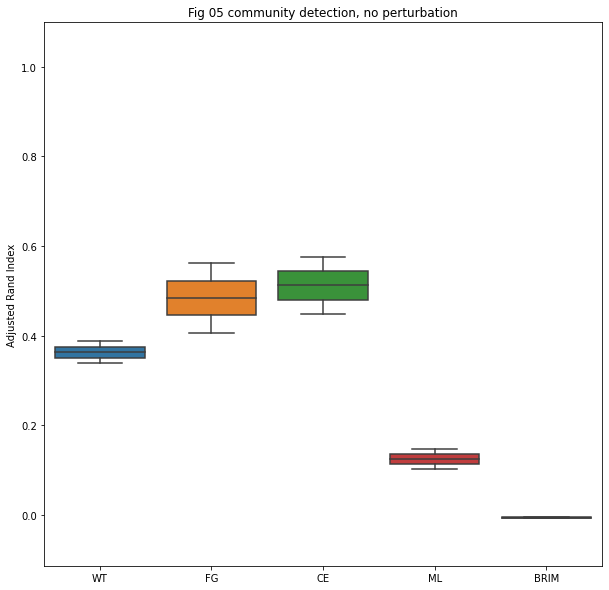

In [9]:
# Example usage (result generation and plotting)


from moo.multicriteria import ComDetMultiCriteria
from moo.contestant import ComDetWalkTrap, ComDetFastGreedy, ComDetEdgeBetweenness, ComDetMultiLevel, ComDetBRIMNoPert

# Define algorithms to run
algos = [
    ComDetWalkTrap(name='WT'),
    ComDetFastGreedy(name='FG'),
    ComDetEdgeBetweenness(name='CE'),
    ComDetMultiLevel(name='ML'),
    ComDetBRIMNoPert(name='BRIM'),
    # ComDetMultiCriteria(name='3d', params = {'mode': '3d', 'popsize': 50, 'termination': None, 'save_history': False, 'seed': None}),
    # ComDetMultiCriteria(name='2d', params = {'mode': '2d', 'popsize': 50, 'termination': None, 'save_history': False, 'seed': None}),
]

# Run algorithms
results = detect_communitites(fig08_expconfig, algos)
df = pd.DataFrame(results) # Column names are inferred from the dictionaries' keys
print(df.shape, df.name.unique())
# df.head()

# # Optional saving
# path = "."
# import os
# os.makedirs(path, exist_ok=True) # Create the path if it does not exist
# df.to_csv(os.path.join(path, 'results.csv'), index=None)

# Extract best solutions for each graph/algorithm pair
from moo.contestant import get_best_community_solutions, draw_best_community_solutions
best_solutions = get_best_community_solutions(df)
# Optional: Sort algorithms to match algorithm order in paper figures
# algo_order = {'walktrap':1, 'fastgreedy':2, 'edgebetweenness':3, 'multilevel':4, 'brim':5, 'multicriteria_3d':5, 'multicriteria_2d':6}
algo_order = {'WT':1, 'FG':2, 'CE':3, 'ML':4, 'BRIM':5, '3d':6, '2d':7} # DEfine required order here
best_solutions['algo_order'] = best_solutions.name.map(algo_order)
best_solutions.sort_values(by=['algo_order'], axis=0, ascending=True, inplace=True, ignore_index=True)
# best_solutions.head()

# Plot results
import matplotlib.pyplot as plt
from moo.contestant import draw_best_community_solutions
fix, ax = plt.subplots(figsize=(10,10))
ax, stats = draw_best_community_solutions(best_solutions, ax)
ax.set_title("Fig 05 community detection, no perturbation")
ax.set_xlabel("")
ax.set_ylabel("Adjusted Rand Index")
min_y = min(df.adj_rand_index.min(), 0) -0.1 # Accounts for BRIM results
ax.set_ylim(min_y,1.1)

### Result generation and plotting

In [10]:
expconfigs = [fig05_expconfig] #, fig06_expconfig, fig07_expconfig, fig08_expconfig, fig09_expconfig_a, fig09_expconfig_b]#[:1]
tags = ['fig05'] #, 'fig06', 'fig07', 'fig08', 'fig09_a', 'fig09_b']#[:1]

from pymoo.factory import get_termination
algos = [
    ComDetWalkTrap(name='WT'),
    ComDetFastGreedy(name='FG'),
    ComDetEdgeBetweenness(name='CE'),
    ComDetMultiLevel(name='ML'),
    ComDetBRIMNoPert(name='BRIM'),
    ComDetMultiCriteria(name='3d', params = {'mode': '3d', 'popsize': 50, 'termination': get_termination('n_gen', 50), 'save_history': False, 'seed': None}),
    ComDetMultiCriteria(name='2d', params = {'mode': '2d', 'popsize': 50, 'termination': get_termination('n_gen', 50), 'save_history': False, 'seed': None}),
]

for expconfig, tag in zip(expconfigs, tags):
    print('Generating results for ', tag, ' ... ', end='')
    results = detect_communitites(expconfig, algos)
    df = pd.DataFrame(results) # Column names are inferred from the dictionaries' keys
    # print(df.shape, df.name.unique())
    # df.head()
    path = "./_temp"
    import os
    import pickle
    os.makedirs(path, exist_ok=True) # Create the path if it does not exist
    df.to_csv(os.path.join(path, f'results_{tag}_nopert.csv'), index=None)
    pickle.dump(df, open(os.path.join(path, f'results_{tag}_brim_nopert.pickle'), 'wb'))
    


Generating results for  fig05  ... <DataGenerator: ExpConfig: L=2, U=30, NumNodes=32, NumEdges=200, ML=0.5, MU=0.5, BC=0.1, NumGraphs=2, shuffle=False, seed=42>


ValueError: high <= 0

In [ ]:
# Extract best solutions for each graph/algorithm pair
from moo.contestant import get_best_community_solutions, draw_best_community_solutions
best_solutions = get_best_community_solutions(df)
# Optional: Sort algorithms to match algorithm order in paper figures
# algo_order = {'walktrap':1, 'fastgreedy':2, 'edgebetweenness':3, 'multilevel':4, 'brim':5, 'multicriteria_3d':5, 'multicriteria_2d':6}
algo_order = {'WT':1, 'FG':2, 'CE':3, 'ML':4, 'BRIM':5, '3d':6, '2d':7} # DEfine required order here
best_solutions['algo_order'] = best_solutions.name.map(algo_order)
best_solutions.sort_values(by=['algo_order'], axis=0, ascending=True, inplace=True, ignore_index=True)
best_solutions.head()

In [ ]:
# Plot results
import matplotlib.pyplot as plt
from moo.contestant import draw_best_community_solutions
fix, ax = plt.subplots(figsize=(10,10))
ax, stats = draw_best_community_solutions(best_solutions, ax)
ax.set_title("Fig 05 community detection, no perturbation")
ax.set_xlabel("")
ax.set_ylabel("Adjusted Rand Index")
ax.grid(axis='y', color = 'green', linestyle = '--', linewidth = 0.5)
min_y = min(df.adj_rand_index.min(), 0) -0.1 # Accounts for BRIM results
ax.set_ylim(min_y,1.1)



## Load and plot results
- Assumes results are generated and stored in path

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from moo.contestant import get_best_community_solutions, draw_best_community_solutions

tags = ['fig05', 'fig06', 'fig07', 'fig08', 'fig09_a', 'fig09_b']
path = './_temp'
shuffle = False

for tag in tags:
    pert='pert' if shuffle else 'nopert'
    df = pd.read_csv(os.path.join(path, f'results_{tag}_{pert}.csv'))
    best_solutions = get_best_community_solutions(df) # Extract best solutions for each graph/algorithm pair
    # Optional: Sort algorithms to match algorithm order in paper figures
    # algo_order = {'walktrap':1, 'fastgreedy':2, 'edgebetweenness':3, 'multilevel':4, 'brim':5, 'multicriteria_3d':5, 'multicriteria_2d':6}
    algo_order = {'WT':1, 'FG':2, 'CE':3, 'ML':4, 'BRIM':5, '3d':6, '2d':7} # DEfine required order here
    best_solutions['algo_order'] = best_solutions.name.map(algo_order)
    best_solutions.sort_values(by=['algo_order'], axis=0, ascending=True, inplace=True, ignore_index=True)
    fig, ax = plt.subplots(figsize=(10,10))
    ax, stats = draw_best_community_solutions(best_solutions, ax)
    ax.set_title(f"{tag} community detection. Perturbation: {shuffle}")
    ax.set_xlabel("")
    ax.set_ylabel("Adjusted Rand Index")
    ax.grid(axis='y', color = 'green', linestyle = '--', linewidth = 0.5)
    min_y = min(df.adj_rand_index.min(), 0) -0.1 # Accounts for BRIM results
    ax.set_ylim(min_y,1.1)
    fig.savefig(os.path.join(path, f'results_{tag}_{pert}.pdf'))



## Fig 07 results plotting

In [ ]:
# Regenerate Fig 07 using old code --> generate data
expgen = DataGenerator(expconfig=fig07_expconfig)
print(expgen)
datagen = expgen.generate_data() # datagen is an iterator

# Generate and save results
from moo.utils import save_graphs_to_path
path ="./_temp/fig07_data_1_nonshuffled/"
os.makedirs(path, exist_ok=True)
save_graphs_to_path(path, datagen)




In [ ]:
# Run legacy 3d and 2d code...
# Please run multicriterion_3d.py and multicriterion_2d.py to generate results

In [ ]:
# load/plot results
import pandas as pd
import matplotlib.pyplot as plt
from moo.contestant import get_best_community_solutions, draw_best_community_solutions
path = './_temp/'
shuffle = False
df2 = pd.read_csv(os.path.join(path, 'fig_07_nopert_2d.csv'))
df3 = pd.read_csv(os.path.join(path, 'fig_07_nopert_3d.csv'))
df = pd.concat([df2,df3], axis=0, ignore_index=True)

best_solutions = get_best_community_solutions(df) # Extract best solutions for each graph/algorithm pair
# Optional: Sort algorithms to match algorithm order in paper figures
# algo_order = {'walktrap':1, 'fastgreedy':2, 'edgebetweenness':3, 'multilevel':4, 'brim':5, 'multicriteria_3d':5, 'multicriteria_2d':6}
algo_order = {'WT':1, 'FG':2, 'CE':3, 'ML':4, 'BRIM':5, '3d':6, '2d':7} # DEfine required order here
best_solutions['algo_order'] = best_solutions.name.map(algo_order)
best_solutions.sort_values(by=['algo_order'], axis=0, ascending=True, inplace=True, ignore_index=True)
fig, ax = plt.subplots(figsize=(10,10))
ax, stats = draw_best_community_solutions(best_solutions, ax)
ax.set_title(f'Fig 07 results, legacy code. Perturbation: {shuffle}')
ax.set_xlabel("")
ax.set_ylabel("Adjusted Rand Index")
ax.grid(axis='y', color = 'green', linestyle = '--', linewidth = 0.5)
min_y = min(df.adj_rand_index.min(), 0) -0.1 # Accounts for BRIM results
ax.set_ylim(min_y,1.1)
fig.savefig(os.path.join(path, 'Fig 07 results, legacy code.pdf'))